In [2]:
##import required packages
from sklearn.manifold import TSNE
import pandas as pd
from xgboost import plot_importance
from xgboost import XGBClassifier
import seaborn as sns
from sklearn.feature_selection import RFE
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np



import warnings
warnings.simplefilter(action='ignore')


In [3]:

c4=pd.read_csv("../data/q2_cluster.csv").drop("Unnamed: 0",axis=1).dropna()


# Clusters = 4


The number of entries per class are:
1.0    1695
0.0    1438
Name: class, dtype: int64 AxesSubplot(0.125,0.125;0.775x0.755)


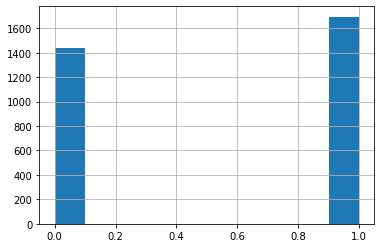

In [5]:
print("The number of entries per class are:\n{}".format(c4['class'].value_counts()),c4['class'].hist())

In [6]:
X1=c4.drop(columns=["class"],axis=1)
y1=c4['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X1, y1)
X_red=None
X_red=c4[X1.columns[(selector.get_support())]]
c4_top_features=X_red.columns.to_list()

print("Top features are\n")
for val in c4_top_features:
    print(val)

Top features are

q_Years of Potential Life Lost Rate
q_Chlamydia Rate
q_% With Annual Mammogram
q_Social Association Rate
q_Violent Crime Rate
q_% Severe Housing Problems
q_Child Mortality Rate
q_% Children Uninsured
q_Average Reading Performance
q_Juvenile Arrest Rate


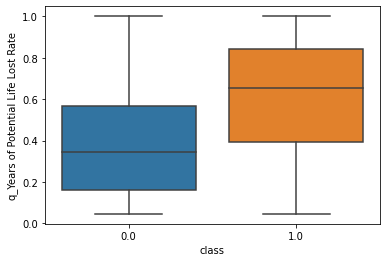

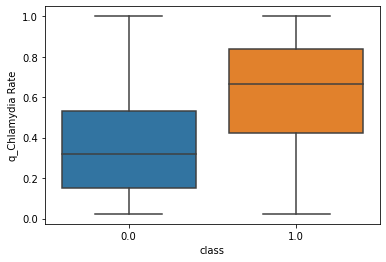

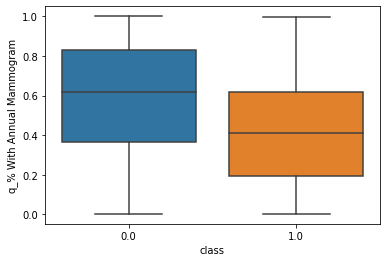

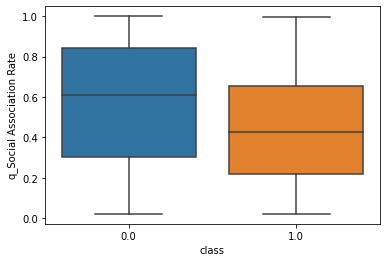

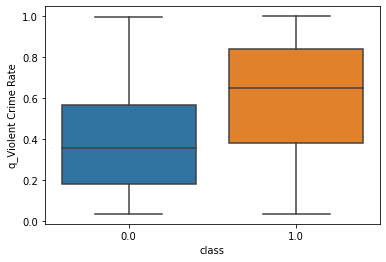

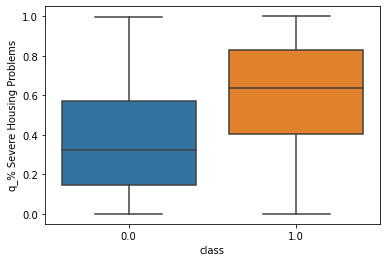

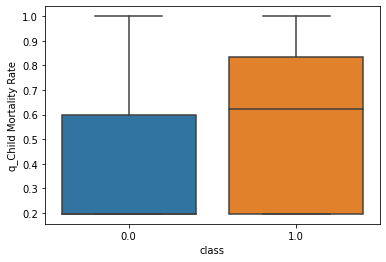

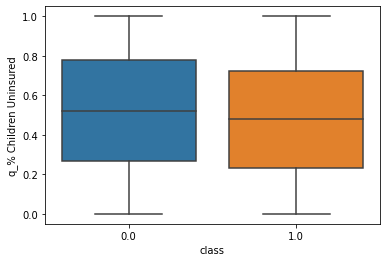

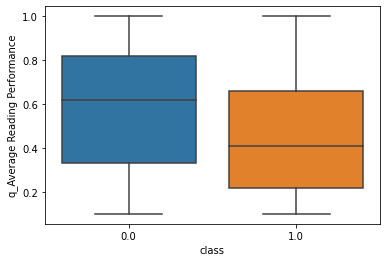

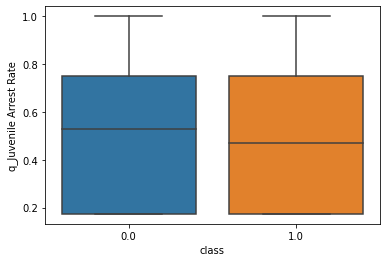

In [7]:
## Boxplots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.boxplot(x=y1,y=X_red[i],data=X_red)

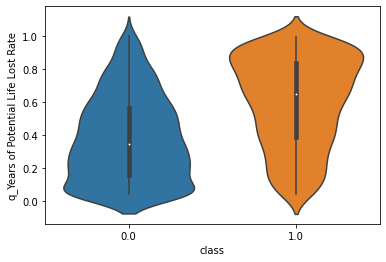

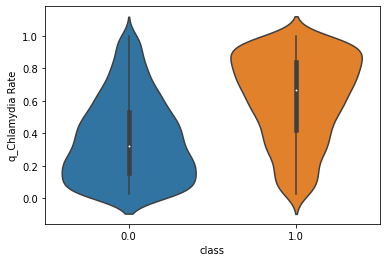

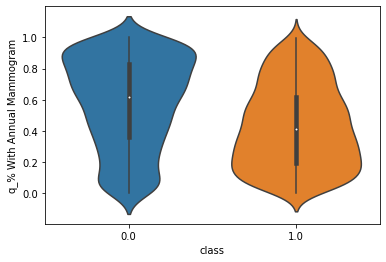

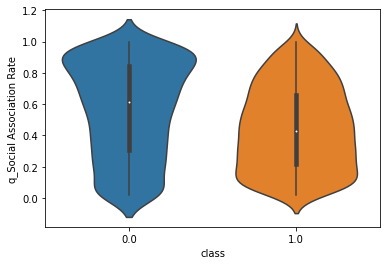

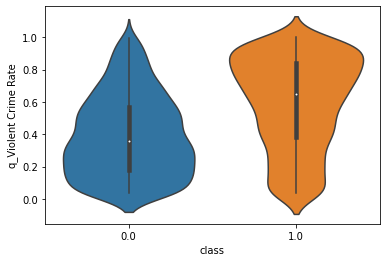

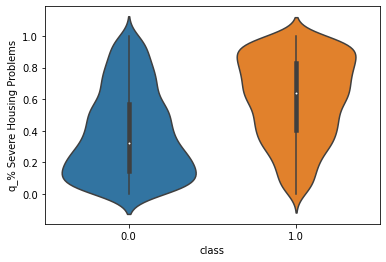

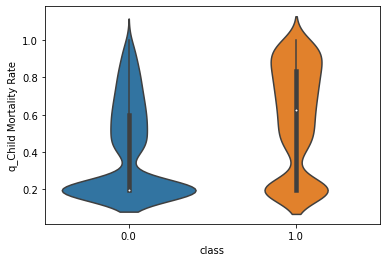

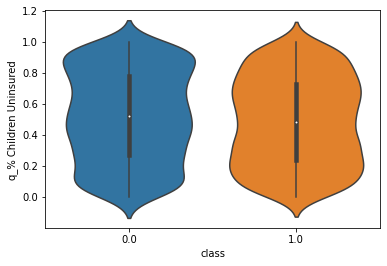

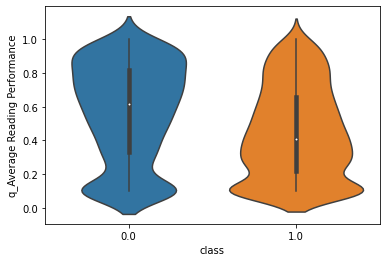

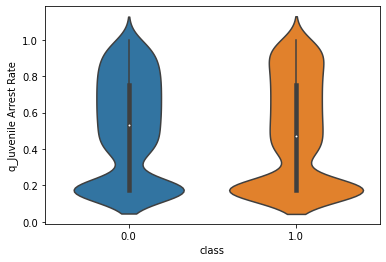

In [8]:
## Violin Plots

for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x=y1,y=X_red[i],data=X_red)

## 1st cluster

1    1438
0    1438
Name: class, dtype: int64
Top features are

q_Years of Potential Life Lost Rate
q_Juvenile Arrest Rate
q_Chlamydia Rate
q_% With Annual Mammogram
q_Violent Crime Rate
q_Average Daily PM2.5
q_% Severe Housing Problems
q_Child Mortality Rate
q_% Children Uninsured
q_Average Reading Performance


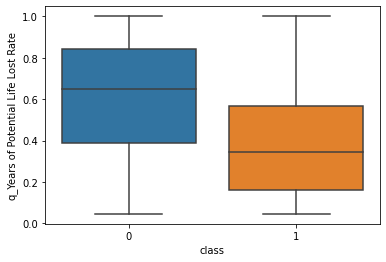

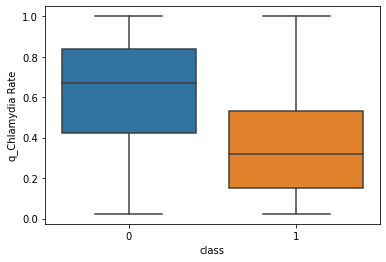

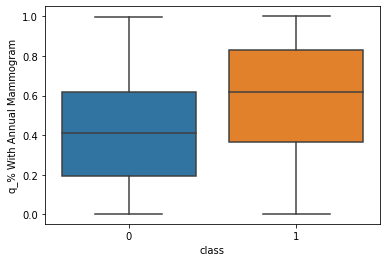

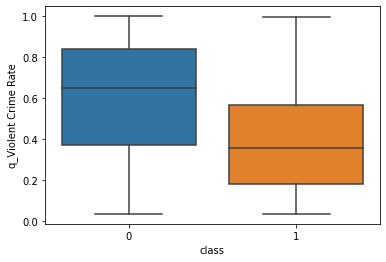

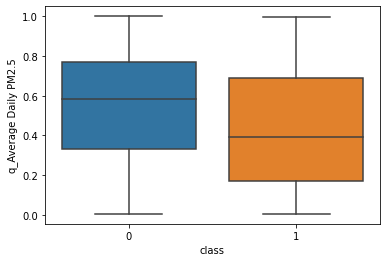

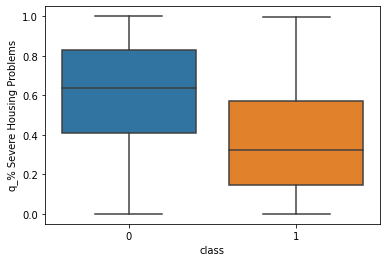

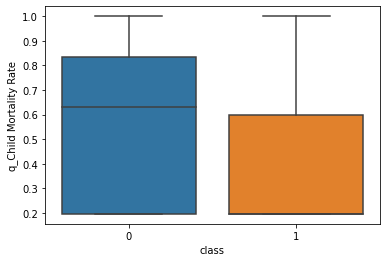

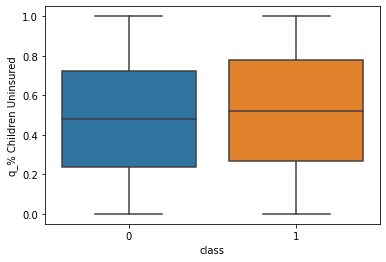

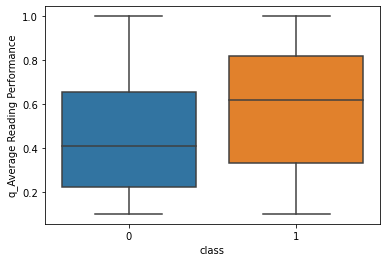

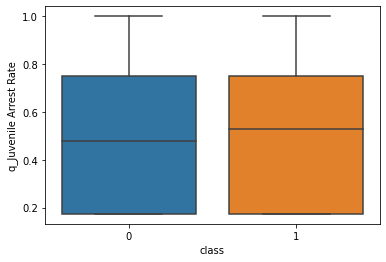

In [9]:
data1=c4[c4['class']==0]
data1_bar=c4[c4['class']!=0]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c41=pd.concat([data1,d],ignore_index=True)
print(c41['class'].value_counts())



X=c41.drop(['class'],axis=1)
y=c41['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]

c4_1_top_features=X.columns[selector.ranking_.argsort()][:10].to_list()
print("Top features are\n")
for val in c4_1_top_features:
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)
#     sns.violinplot(x=y,y=X[i],data=X)

## 2nd cluster

1    1695
0    1438
Name: class, dtype: int64
Top features are

q_Years of Potential Life Lost Rate
q_Average Reading Performance
q_% Children Uninsured
q_Child Mortality Rate
q_% Severe Housing Problems
q_Violent Crime Rate
q_Social Association Rate
q_Juvenile Arrest Rate
q_% With Annual Mammogram
q_Chlamydia Rate


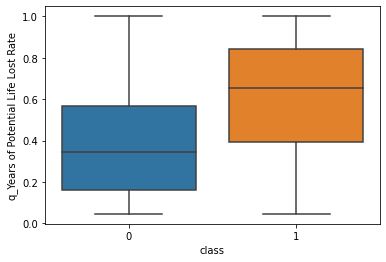

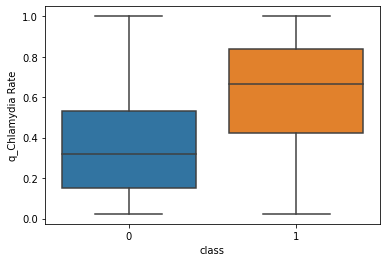

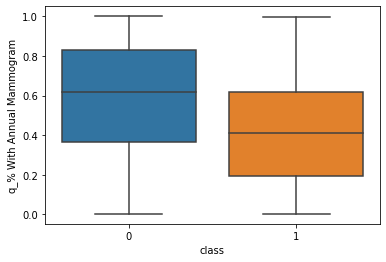

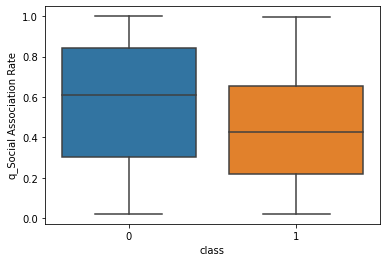

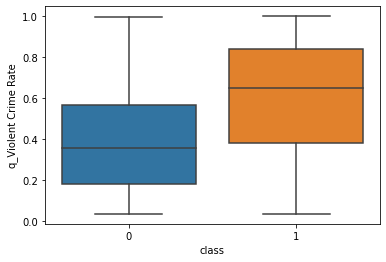

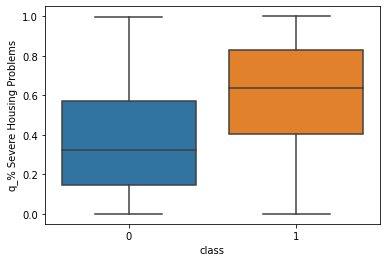

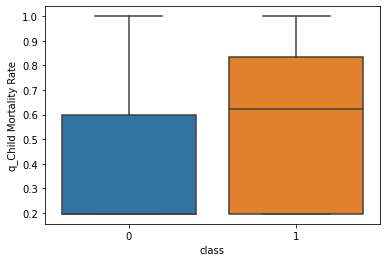

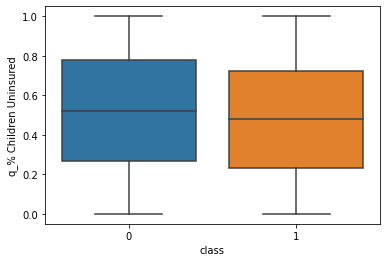

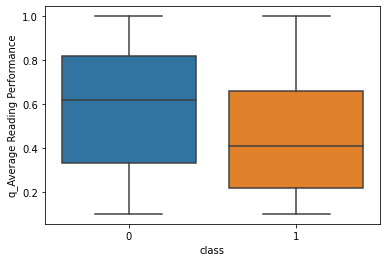

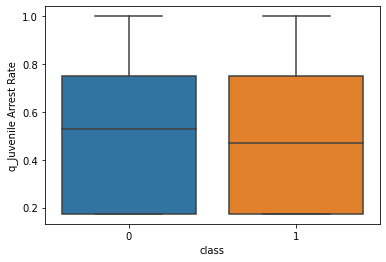

In [10]:
data1=c4[c4['class']==1]
data1_bar=c4[c4['class']!=1]
if len(data1)>1500:
    d=data1_bar
else:
    d=data1_bar.sample(n=len(data1))
data1['class']=1
d['class']=0
c42=pd.concat([data1,d],ignore_index=True)
print(c42['class'].value_counts())


X=c42.drop(['class'],axis=1)
y=c42['class']
top_n_features=10
model = XGBClassifier()
selector = RFE(model, n_features_to_select=top_n_features, step=1)
selector = selector.fit(X, y)
X_imp=None
X_imp=c4[X.columns[(selector.get_support())]]
c4_2_top_features=X.columns[selector.ranking_.argsort()][:10].to_list()
print("Top features are\n")
for val in c4_2_top_features:
    print(val)


for i in X_imp.columns:
    plt.figure(frameon=False)
    sns.boxplot(x=y,y=X[i],data=X)

In [32]:
Feature_data=pd.DataFrame(columns=['all','c41','c42'])

In [33]:
# Top 10 features making contributing towards n=4 clusters case
Feature_data['all']=(c4_top_features) 

# Top 10 features making contributing towards 1st cluster 
Feature_data['c41']=c4_1_top_features 

# Top 10 features making contributing towards 2nd cluster 
Feature_data['c42']=c4_2_top_features 

# # Top 10 features making contributing towards 3rd cluster
# Feature_data['c43']=c4_3_top_features 


# # Top 10 features making contributing towards 4th cluster 
# Feature_data['c44']=c4_4_top_features 


In [34]:
Feature_data

,all,c41,c42
0,q_Years of Potential Life Lost Rate,q_Years of Potential Life Lost Rate,q_Years of Potential Life Lost Rate
1,q_Chlamydia Rate,q_Juvenile Arrest Rate,q_Average Reading Performance
2,q_% With Annual Mammogram,q_Chlamydia Rate,q_% Children Uninsured
3,q_Social Association Rate,q_% With Annual Mammogram,q_Child Mortality Rate
4,q_Violent Crime Rate,q_Violent Crime Rate,q_% Severe Housing Problems
5,q_% Severe Housing Problems,q_Average Daily PM2.5,q_Violent Crime Rate
6,q_Child Mortality Rate,q_% Severe Housing Problems,q_Social Association Rate
7,q_% Children Uninsured,q_Child Mortality Rate,q_Juvenile Arrest Rate
8,q_Average Reading Performance,q_% Children Uninsured,q_% With Annual Mammogram
9,q_Juvenile Arrest Rate,q_Average Reading Performance,q_Chlamydia Rate


In [35]:
df = Feature_data.apply(lambda x: x.sort_values().values)

In [36]:
df

,all,c41,c42
0,q_% Children Uninsured,q_% Children Uninsured,q_% Children Uninsured
1,q_% Severe Housing Problems,q_% Severe Housing Problems,q_% Severe Housing Problems
2,q_% With Annual Mammogram,q_% With Annual Mammogram,q_% With Annual Mammogram
3,q_Average Reading Performance,q_Average Daily PM2.5,q_Average Reading Performance
4,q_Child Mortality Rate,q_Average Reading Performance,q_Child Mortality Rate
5,q_Chlamydia Rate,q_Child Mortality Rate,q_Chlamydia Rate
6,q_Juvenile Arrest Rate,q_Chlamydia Rate,q_Juvenile Arrest Rate
7,q_Social Association Rate,q_Juvenile Arrest Rate,q_Social Association Rate
8,q_Violent Crime Rate,q_Violent Crime Rate,q_Violent Crime Rate
9,q_Years of Potential Life Lost Rate,q_Years of Potential Life Lost Rate,q_Years of Potential Life Lost Rate


In [37]:
columns=df['all'].tolist()
# columns.append('class')


### Data distribution for most important features for n_cluster=4

In [26]:
# from sklearn.preprocessing import quantile_transform as qt
# new_df=c4[columns]
# X_all=c4.drop('class',axis=1)
# X_norm1=qt(new_df, n_quantiles=5, random_state=13, copy=False)
# X_norm2=qt(X_all, n_quantiles=5, random_state=13, copy=False)
# new_df[columns] = X_norm1

# X_all=X_norm2

In [30]:
new_df['class']=c4['class']

array([[0.08333333, 0.64203822, 0.5       , ..., 0.57621173, 0.67113665,
        0.51915709],
       [0.22190294, 0.52643312, 0.60631229, ..., 0.4201788 , 0.52777778,
        0.40975765],
       [0.12100894, 0.63535032, 0.70365449, ..., 0.19982578, 0.84502551,
        0.79145408],
       ...,
       [0.81878981, 0.14764031, 0.29598446, ..., 0.43103448, 0.71519796,
        0.48214286],
       [0.88917197, 0.81896552, 0.5551495 , ..., 0.83896684, 0.        ,
        0.05616225],
       [0.77675159, 0.28607918, 0.09639452, ..., 0.03083624, 0.15282949,
        0.40656888]])

## Facetgrids with clusterwise data distribution for top 10 features

In [40]:
new_df=c4[columns]
new_df['class']=c4['class']

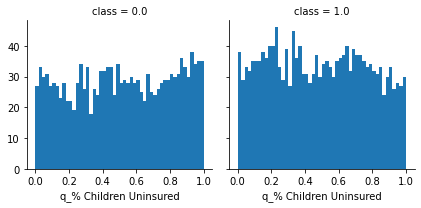

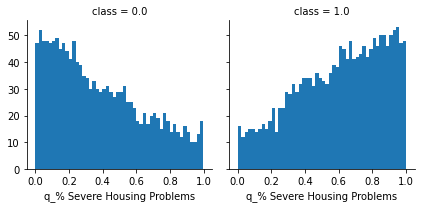

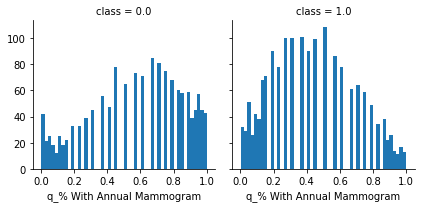

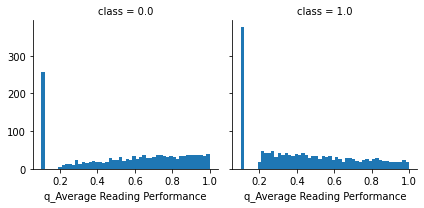

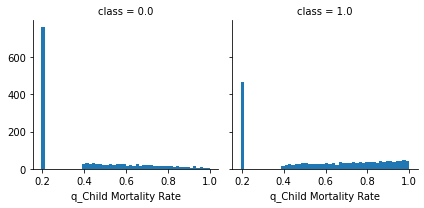

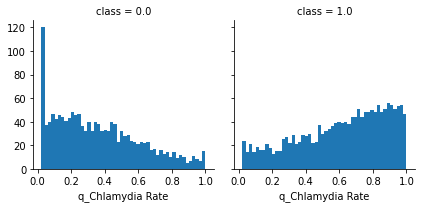

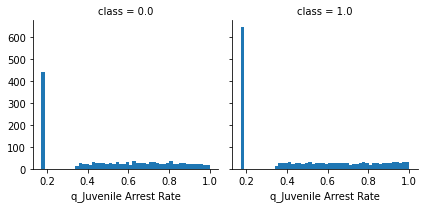

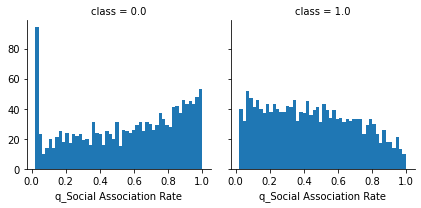

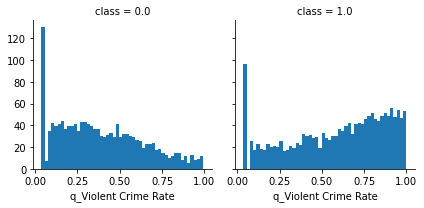

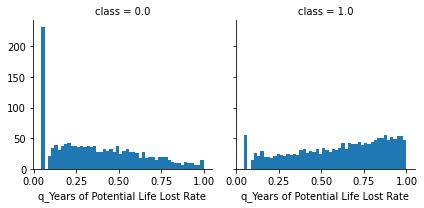

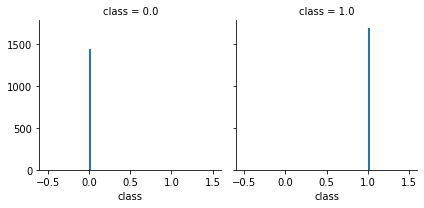

In [42]:
#https://www.kaggle.com/sabanasimbutt/clustering-visualization-of-clusters-using-pca

for features in new_df:
    grid= sns.FacetGrid(new_df, col='class')
    grid.map(plt.hist, features,bins=50)
    

In [120]:
columns

['% American Indian & Alaska Native',
 '% Long Commute - Drives Alone',
 '% Uninsured',
 'Average Daily PM2.5',
 'Child Mortality Rate',
 'Chlamydia Rate',
 'Deaths',
 'Drug Overdose Mortality Rate',
 'Life Expectancy',
 'Years of Potential Life Lost Rate']

In [121]:
X_new=c4[columns]

In [122]:
# X_filtered=X_new
# X_fileterd['class']=c4['class']

In [123]:
# X_filtered_norm = X_filtered.copy()
# d = {}
# for col in X_filtered_norm:
#     d.update({col : sorted(X_filtered_norm[col])})
# sorted_X_filtered_norm = pd.DataFrame(d)
# rank = sorted_X_filtered_norm.mean(axis = 1).tolist()
# for col in X_filtered_norm:
#     t = np.searchsorted(np.sort(X_filtered_norm[col]), X_filtered_norm[col])
#     X_filtered_norm[col] = [rank[i] for i in t]


In [124]:
# X_filtered_norm.boxplot(grid=True, rot=45,figsize=(20,14))

In [125]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(X_new)
# df_normalized = pd.DataFrame(x_scaled,columns=columns)

In [126]:
new_df['class']=c4['class']

## Boxplots for all the top 10 important features grouped by respective cluster labels

<AxesSubplot:xlabel='class', ylabel='value'>

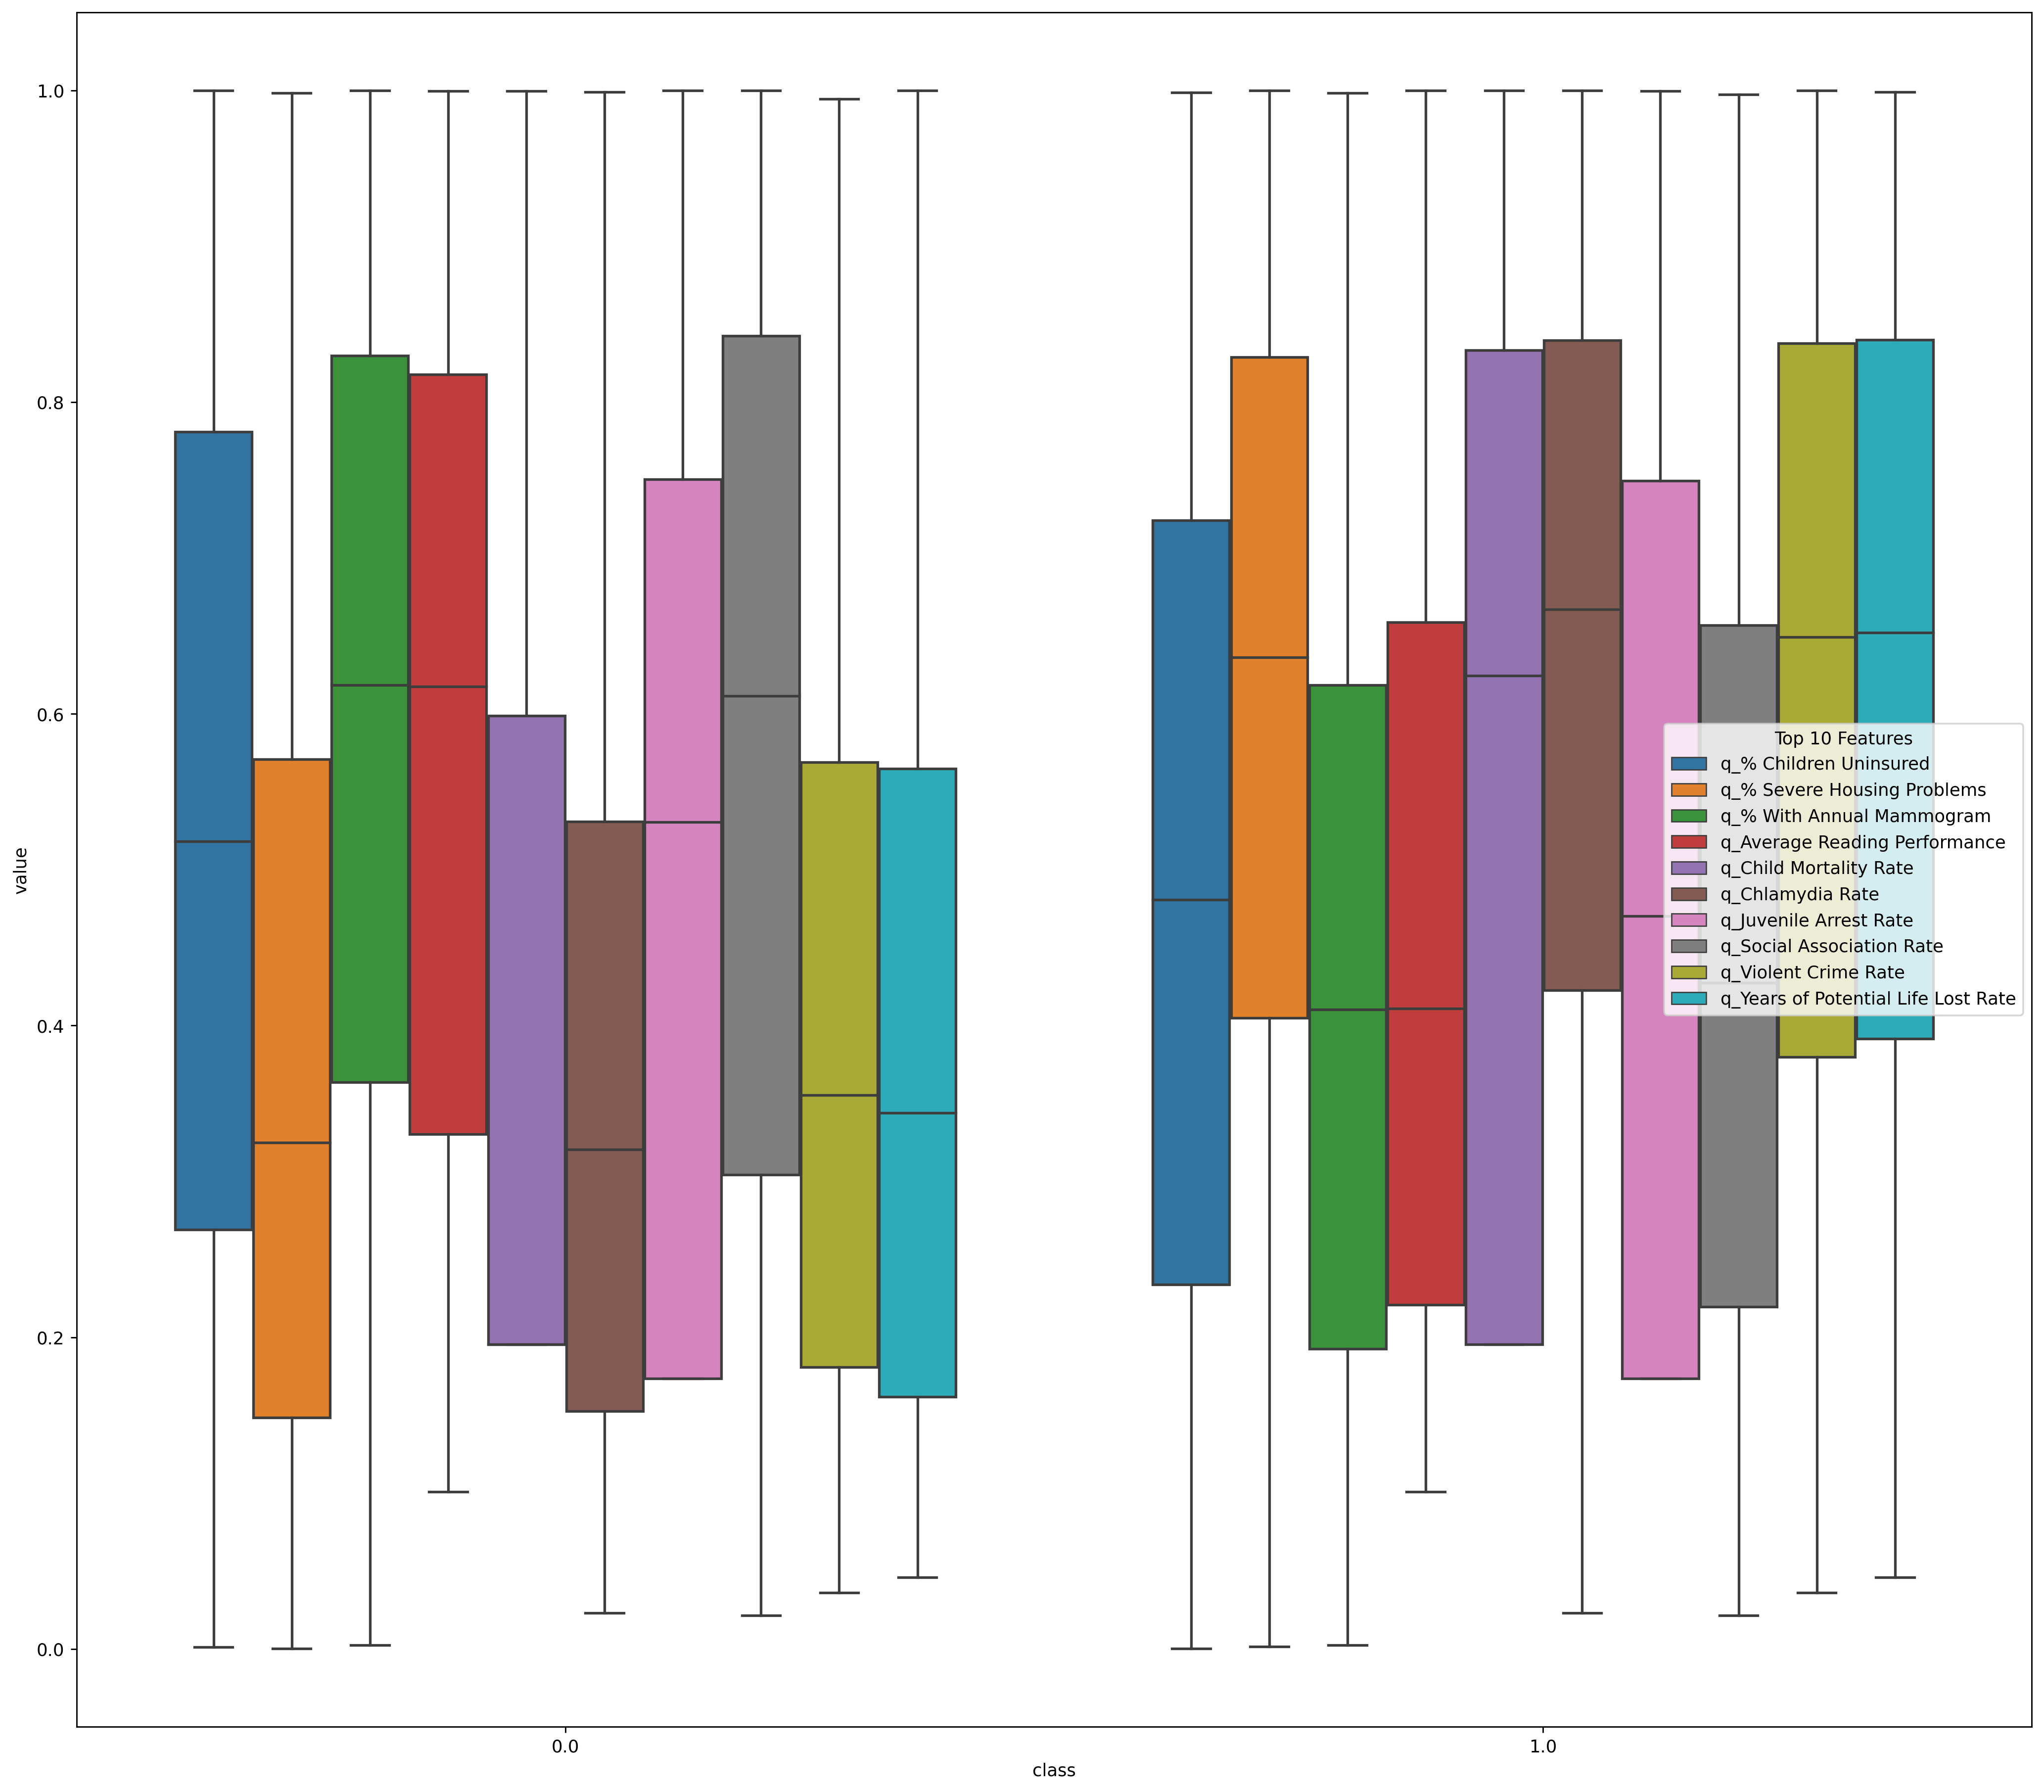

In [43]:
import seaborn as sns
plt.figure(frameon=False,figsize=(20,18),dpi=255)
dd=pd.melt(new_df,id_vars=['class'],value_vars=columns,var_name='Top 10 Features')
sns.boxplot(x='class',y='value',data=dd,hue='Top 10 Features',)
# plt.savefig('feature_boxplot_for_ncluster=4.png')

In [44]:
X_new=new_df.drop('class',axis=1)
labels=c4['class']

In [45]:
dist = 1 - cosine_similarity(X_norm1)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(3133, 2)

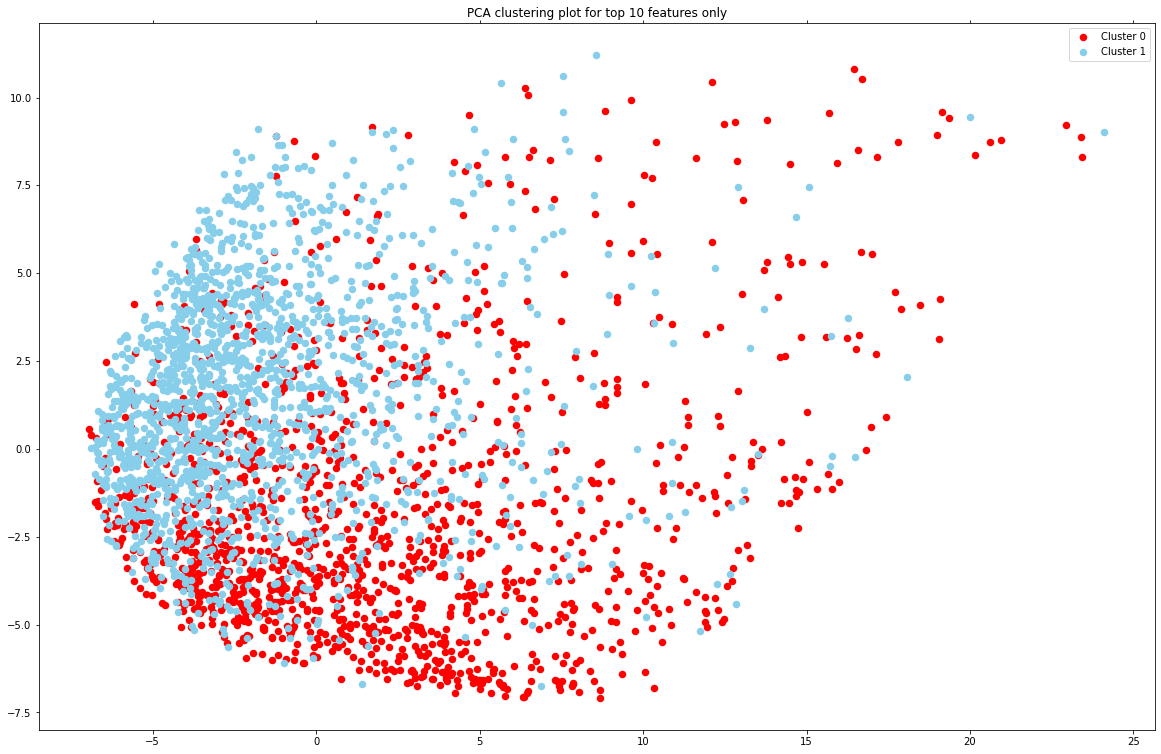

In [46]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'skyblue',
          2: 'black', 
          3: 'purple', 
         }

names = {0: 'Cluster 0', 
         1: 'Cluster 1', 
         2: 'Cluster 2', 
         3: 'Cluster 3', 
         }
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=15,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
plt.title("PCA clustering plot for top 10 features only")
plt.show()